In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ML_utils import load_data,load_data_test_set, total_day_eve_night_grouping
df =pd.read_csv('train.csv')

### UNCOMMENT THIS PART TO GROUP FEATURES
feature_engineering = True
df=total_day_eve_night_grouping(df,grouping=feature_engineering)
exclude_list = [feature_name for feature_name in df.columns if feature_name not in['number_vmail_messages','number_customer_service_calls','total_charges','churn']]
one_hot_on = True
normalize_on = True
oversample_on=False


###################
#### LOAD DATA ####

X_train,y_train,X_val,y_val,X_test,y_test,columns = load_data(df,exclude=exclude_list,one_hot=one_hot_on,normalize_=normalize_on,oversample=oversample_on)



X_train.shape
y_train=y_train.ravel()

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor


clf_rf = RandomForestRegressor(n_estimators=100, max_depth=10,random_state=0)
clf_rf.fit(X_train, y_train)
clf_nn = MLPRegressor(hidden_layer_sizes=(32,64,32), max_iter=1000, alpha=0.0001, solver='adam')
clf_nn.fit(X_train, y_train)
clf_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=10)
clf_gb.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_val)
y_pred_nn = clf_nn.predict(X_val)
y_pred_gb = clf_gb.predict(X_val)



In [50]:
y_pred_nn[y_pred_nn<0]=0
y_pred_rf[y_pred_rf>=0]=1

array([ 5.85288368e-02,  5.18391132e-02,  9.51127782e-02,  4.26537246e-02,
        7.51513094e-02,  3.94887775e-02,  1.95490569e-02,  7.85342380e-02,
        5.92518896e-02,  7.36431777e-03,  3.92786637e-02,  2.07183957e-02,
       -1.95476264e-02, -5.28271496e-03, -9.80708003e-03,  3.47706378e-02,
        3.27182189e-02,  1.91519707e-01,  5.14938980e-02,  1.20914161e-01,
        2.66391635e-02,  2.57062167e-02,  8.58402327e-02,  9.53674793e-01,
        3.84916067e-02,  6.38821125e-02,  1.21477976e-01,  5.65205589e-02,
        8.18755180e-02, -8.54611397e-04,  9.54469219e-02,  5.63514531e-02,
        9.78698969e-01,  3.75889763e-02,  5.60676157e-02, -1.34592205e-01,
        1.03233323e-01, -2.86968350e-02,  4.20637876e-02,  1.10217929e-02,
        4.34175134e-04,  9.16886806e-01,  5.84102869e-02,  1.01166263e-01,
        1.51824504e-02, -1.37966126e-02,  7.97459036e-02,  2.21287459e-02,
        4.25554514e-02,  3.71217430e-02,  7.56442994e-02,  6.21212125e-02,
        2.52135247e-02, -

0.4562869469412889

In [14]:
y_pred=clf.predict(X_val)

In [17]:
y_pred[y_pred>0.5]=1
y_pred[y_pred<=0.5]=0

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,y_pred)

0.902668759811617

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


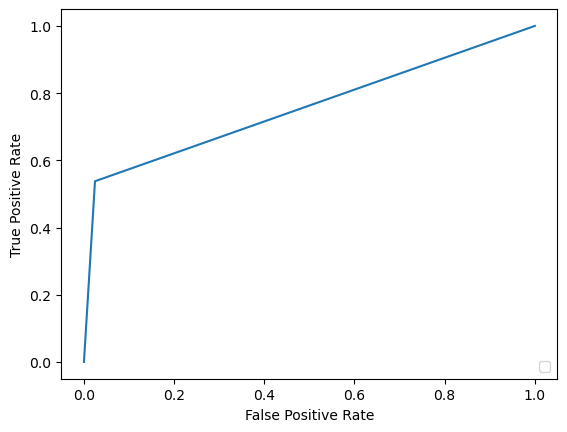

In [26]:
from sklearn.metrics import RocCurveDisplay, roc_curve



fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

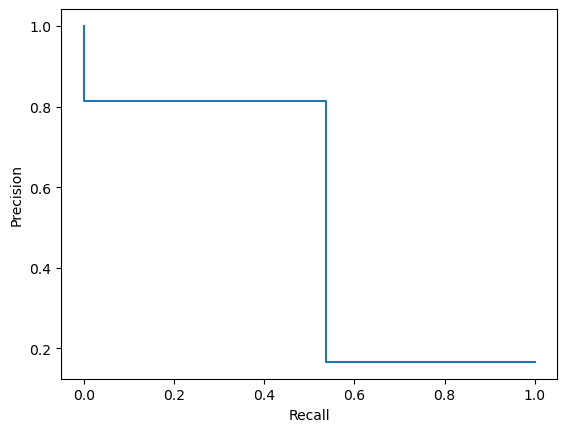

In [28]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, _ = precision_recall_curve(y_val, y_pred)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


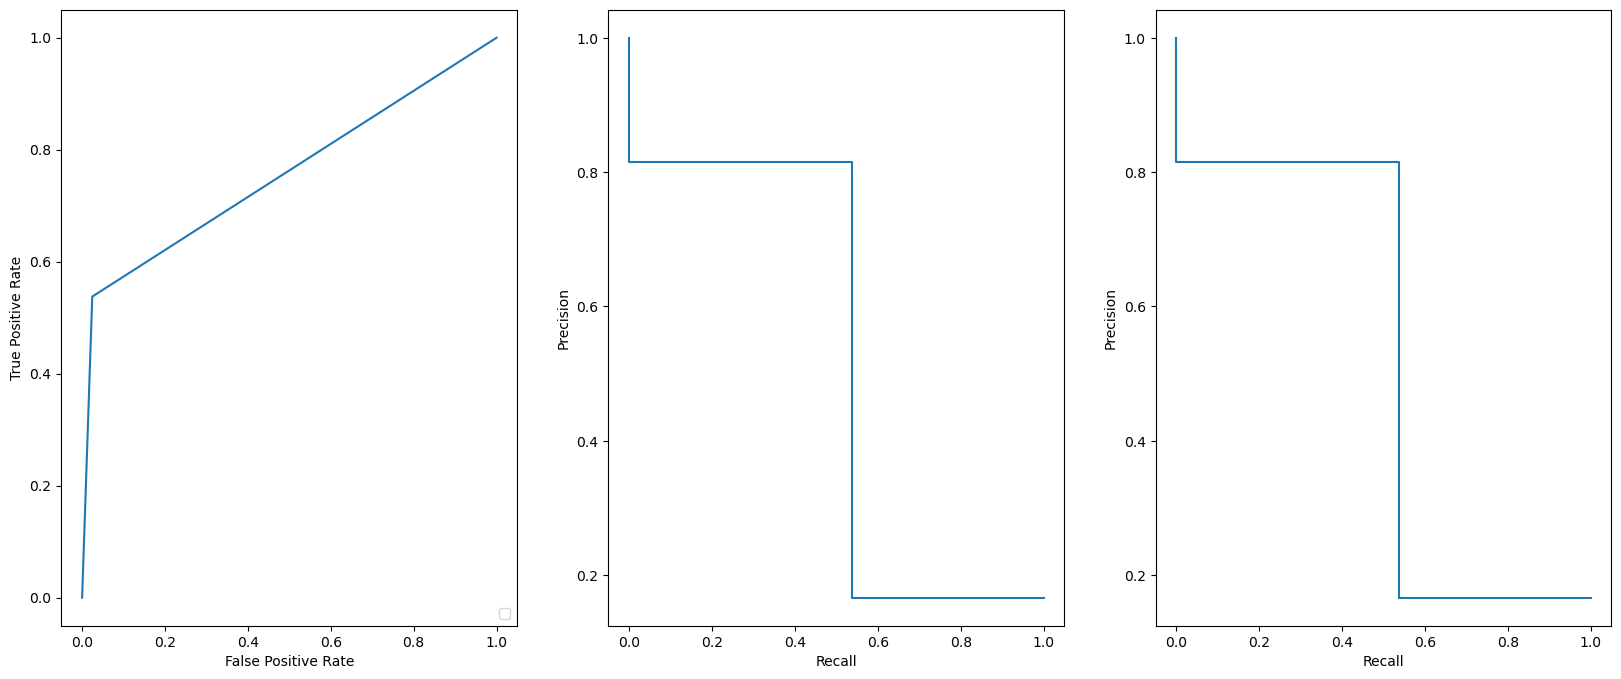

In [40]:
import matplotlib.pyplot as plt


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
pr_display.plot(ax=ax3)
plt.show()